# Car Price Prediction

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import r2_score
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
sns.set_style('whitegrid')
import os
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv('bmw_pricing_challenge.csv')

In [4]:
data.head(10)

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
5,BMW,335,152352,225,2011-05-01,petrol,black,convertible,True,True,False,False,True,True,True,True,17100,2018-02-01
6,BMW,325,205219,145,2009-05-01,diesel,grey,convertible,True,True,False,False,True,True,True,True,12400,2018-02-01
7,BMW,118,115560,105,2009-08-01,petrol,white,convertible,True,True,False,False,False,True,True,False,6100,2018-02-01
8,BMW,Z4,123886,125,2004-07-01,petrol,black,convertible,True,False,False,False,False,True,True,False,6200,2018-03-01
9,BMW,320,139541,135,2013-06-01,diesel,white,convertible,False,False,False,False,True,False,True,False,17300,2018-03-01


In [4]:
data.shape

(4843, 18)

In [5]:
data.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,4843.0,140962.799504,60196.740703,-64.0,102913.5,141080.0,175195.5,1000376.0
engine_power,4843.0,128.988230,38.993360,0.0,100.0,120.0,135.0,423.0
price,4843.0,15828.081767,9220.285684,100.0,10800.0,14200.0,18600.0,178500.0


In [7]:
data.dtypes

maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

In [8]:
data['registration_date']=pd.to_datetime(data['registration_date'])
data['sold_at']=pd.to_datetime(data['sold_at'])

In [9]:
data[data['mileage']<0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,-64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


In [10]:
data.at[2938, 'mileage'] = 64

In [11]:
data[data['mileage']==64]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


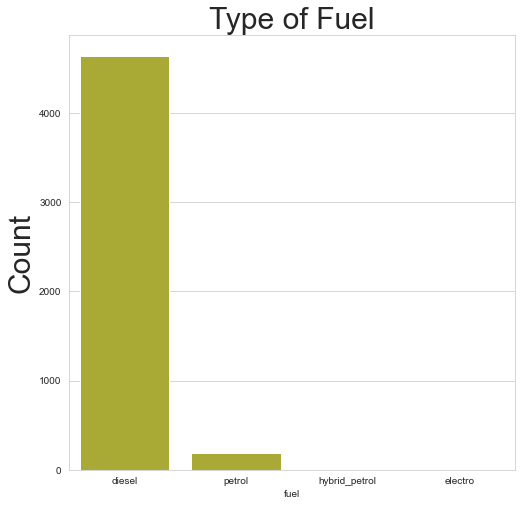

In [12]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='fuel',color=base_color)
plt.title('Type of Fuel',fontsize=30)
plt.ylabel('Count',fontsize=30)

locs, labels = plt.xticks()


(array([0, 1, 2, 3]),
 [Text(0, 0, 'diesel'),
  Text(1, 0, 'petrol'),
  Text(2, 0, 'hybrid_petrol'),
  Text(3, 0, 'electro')])

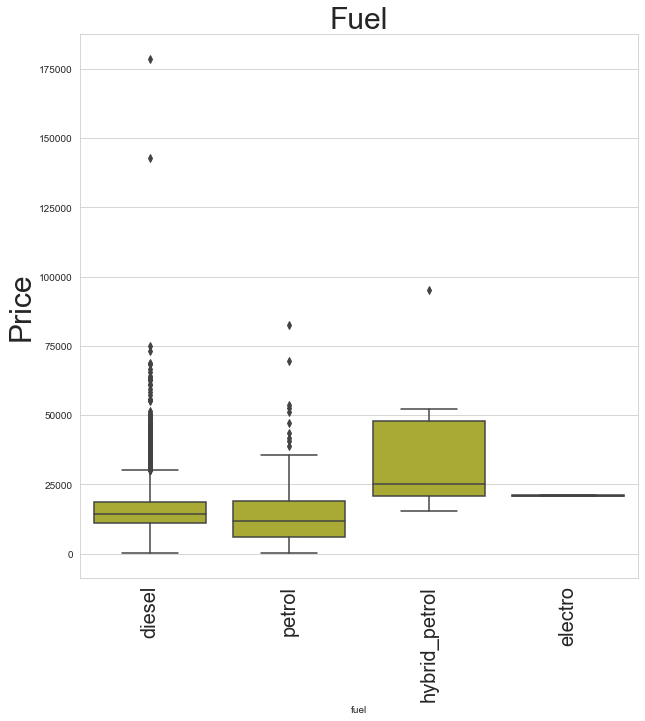

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='fuel',y='price',color=base_color,order=data.fuel.value_counts().index);
plt.title('Fuel',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(fontsize=20,rotation=90)

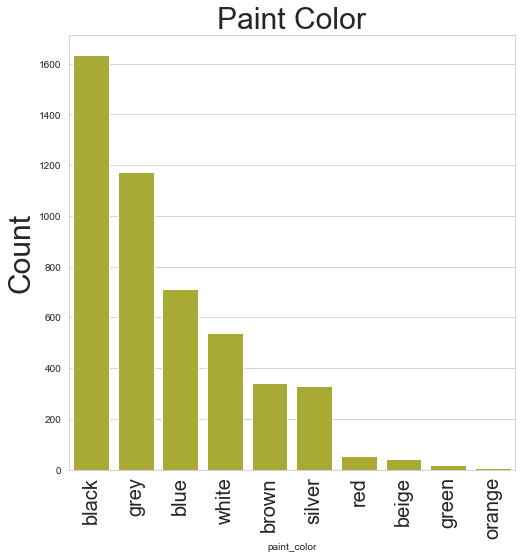

In [14]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='paint_color',color=base_color,order=data.paint_color.value_counts().index)
plt.title('Paint Color',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()

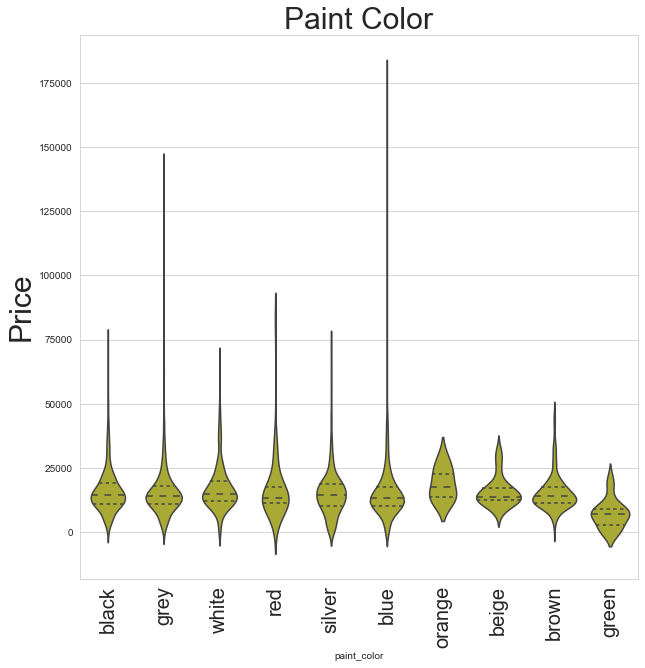

In [15]:
#Let see how the color is related to price in the resale market . THe data is has more points for black , grey and blue

plt.figure(figsize=(10,10));
sns.violinplot(data=data,x='paint_color',y='price',inner='quartile',color=base_color);
plt.ylabel('Price',fontsize=30);
#plt.xlabel('Paint Color',fontsize=30);
plt.title("Paint Color",fontsize=30);
plt.xticks(rotation=90,fontsize=20);

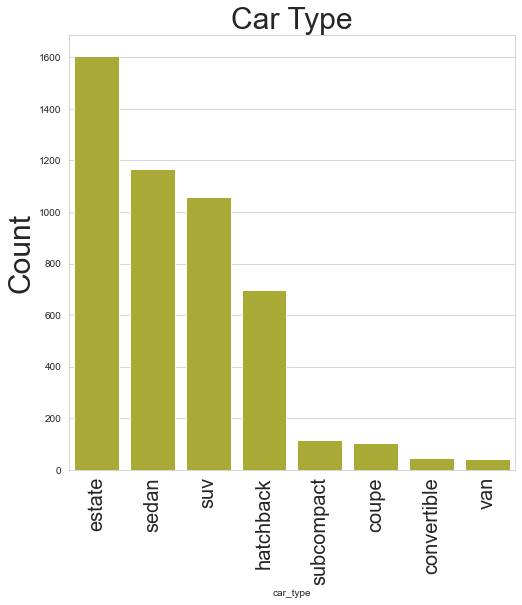

In [16]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='car_type',color=base_color,order=data.car_type.value_counts().index)
plt.title('Car Type',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'estate'),
  Text(1, 0, 'sedan'),
  Text(2, 0, 'suv'),
  Text(3, 0, 'hatchback'),
  Text(4, 0, 'subcompact'),
  Text(5, 0, 'coupe'),
  Text(6, 0, 'convertible'),
  Text(7, 0, 'van')])

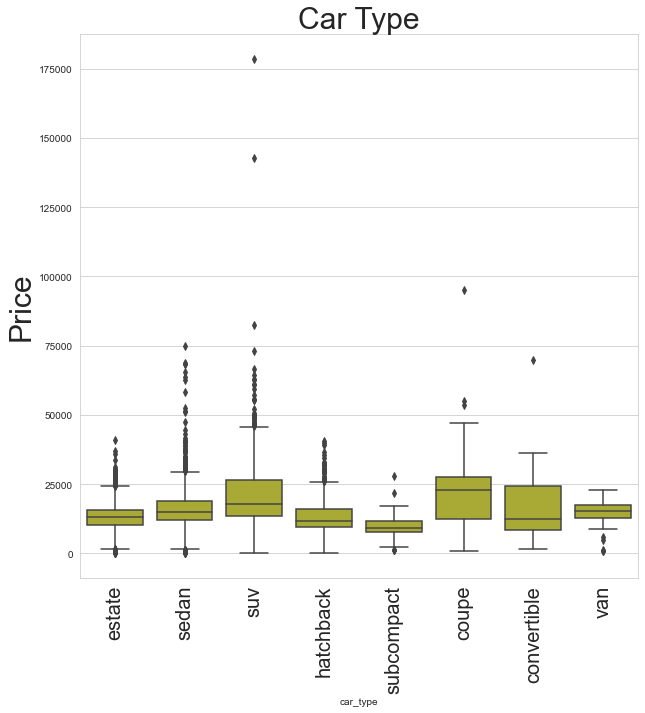

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='car_type',y='price',color=base_color,order=data.car_type.value_counts().index);
plt.title('Car Type',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(fontsize=20,rotation=90)

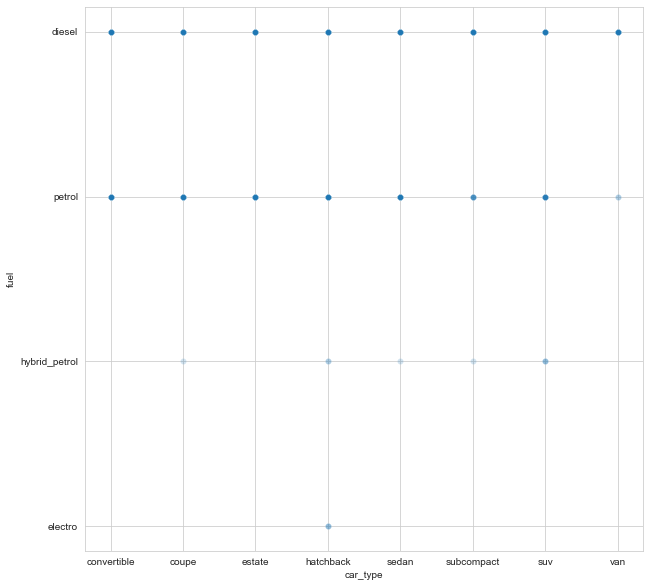

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='car_type',y='fuel',alpha=0.2,x_jitter=0.2);

In [19]:
#Creating a colum called as registration year 
data['registration_year']=data['registration_date'].dt.year

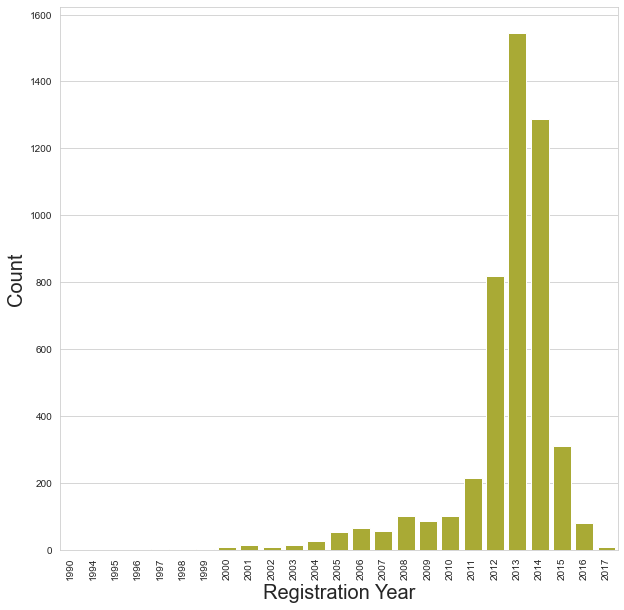

In [20]:
plt.figure(figsize=(10,10));
sns.countplot(data=data,x='registration_year',color=base_color);
plt.xticks(rotation=90);
plt.xlabel('Registration Year',fontsize=20);
plt.ylabel('Count',fontsize=20);

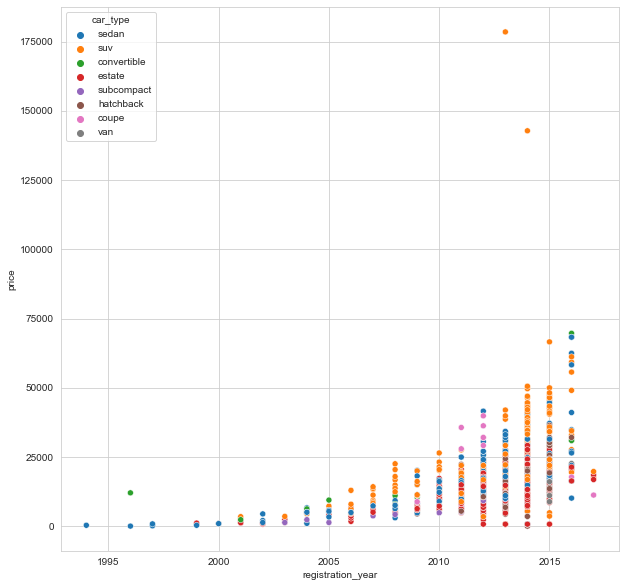

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data.sample(2000),x='registration_year',y='price',hue='car_type');

In [22]:
data.dtypes

maker_key                    object
model_key                    object
mileage                       int64
engine_power                  int64
registration_date    datetime64[ns]
fuel                         object
paint_color                  object
car_type                     object
feature_1                      bool
feature_2                      bool
feature_3                      bool
feature_4                      bool
feature_5                      bool
feature_6                      bool
feature_7                      bool
feature_8                      bool
price                         int64
sold_at              datetime64[ns]
registration_year             int64
dtype: object

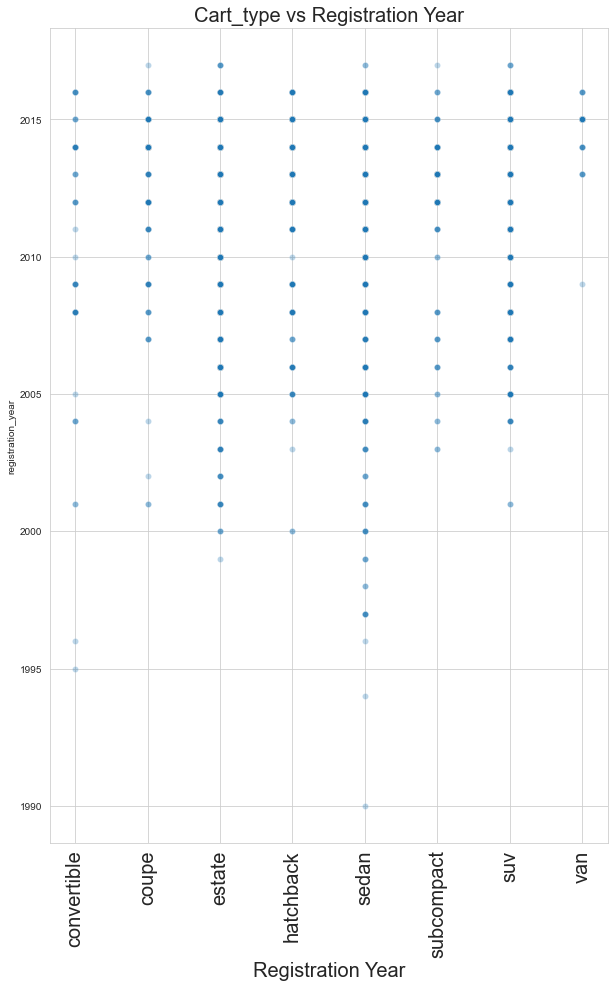

In [23]:
plt.figure(figsize=(10,15));
#sns.regplot(x="car_type",y="registration_date",data=data)
sns.scatterplot(data=data,x='car_type',y='registration_year',alpha=0.3);
plt.xticks(rotation=90,fontsize=20);
plt.xlabel('Car Type',fontsize=20);
plt.xlabel('Registration Year',fontsize=20);
plt.title('Cart_type vs Registration Year',fontsize=20);

# Model 2

In [28]:
 data['vechile_days']=data['sold_at']-data['registration_date']
data['year_diff']=data['sold_at'].dt.year-data['registration_year']

In [29]:
data[data["price"]<10000]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,registration_year,vechile_days,year_diff
7,BMW,118,115560,105,2009-08-01,petrol,white,convertible,True,True,...,False,False,True,True,False,6100,2018-02-01,2009,3106 days,9
8,BMW,Z4,123886,125,2004-07-01,petrol,black,convertible,True,False,...,False,False,True,True,False,6200,2018-03-01,2004,4991 days,14
15,BMW,120,208945,130,2008-04-01,diesel,grey,convertible,True,True,...,False,True,False,True,True,8300,2018-04-01,2008,3652 days,10
17,BMW,650,24521,270,2008-01-01,petrol,grey,convertible,True,False,...,False,False,False,True,False,9200,2018-09-01,2008,3896 days,10
19,BMW,Z4,128940,110,2008-03-01,petrol,black,convertible,True,False,...,False,False,False,True,False,7700,2018-05-01,2008,3713 days,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,BMW,216,31079,85,2015-11-01,diesel,black,van,False,True,...,False,False,False,False,False,4800,2018-03-01,2015,851 days,3
4806,BMW,218,118323,110,2014-09-01,diesel,white,van,False,False,...,False,False,False,False,False,800,2018-02-01,2014,1249 days,4
4810,BMW,216 Active Tourer,193657,85,2015-03-01,diesel,silver,van,False,False,...,False,False,False,True,False,8900,2018-09-01,2015,1280 days,3
4812,BMW,218,120849,110,2015-06-01,diesel,blue,van,False,False,...,False,False,False,False,True,6000,2018-04-01,2015,1035 days,3


In [30]:
data[data["mileage"]<4000]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,registration_year,vechile_days,year_diff
471,BMW,318,3142,100,2016-09-01,diesel,blue,estate,True,True,...,False,False,False,True,False,21400,2018-02-01,2016,518 days,2
781,BMW,318,3478,100,2016-09-01,diesel,blue,estate,True,True,...,False,False,False,True,False,21400,2018-03-01,2016,546 days,2
2409,BMW,420 Gran Coupé,476,120,2014-05-01,diesel,blue,hatchback,True,True,...,False,False,True,True,True,30300,2018-08-01,2014,1553 days,4
2938,BMW,640 Gran Coupé,64,230,2017-03-01,diesel,black,sedan,True,True,...,True,False,False,True,True,75000,2018-04-01,2017,396 days,1
3687,BMW,116,2399,85,2016-11-01,diesel,white,subcompact,False,False,...,False,False,False,True,False,17300,2018-03-01,2016,485 days,2
3935,BMW,X5,706,155,2017-07-01,diesel,black,suv,True,True,...,True,True,True,True,True,41600,2018-02-01,2017,215 days,1
4146,BMW,X6 M,2970,423,2016-04-01,petrol,red,suv,True,True,...,False,False,False,True,True,82400,2018-04-01,2016,730 days,2
4372,BMW,X5,612,183,2016-10-01,diesel,black,suv,True,True,...,False,False,False,True,True,49100,2018-06-01,2016,608 days,2


In [31]:
data=data[data.price<100000] 
data=data[data.mileage<400000] 

features=data[['mileage','engine_power','paint_color','car_type','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','price','vechile_days']]

features=pd.get_dummies(features,drop_first=True)


features['vechile_days']=features['vechile_days'].values.astype('int')
features['feature_1']=features['feature_1'].astype('int')
features['feature_2']=features['feature_2'].astype('int')
features['feature_3']=features['feature_3'].astype('int')
features['feature_4']=features['feature_4'].astype('int')
features['feature_5']=features['feature_5'].astype('int')
features['feature_6']=features['feature_6'].astype('int')
features['feature_7']=features['feature_7'].astype('int')
features['feature_8']=features['feature_8'].astype('int')

columns_names=features.columns

sc = StandardScaler()
features = sc.fit_transform(features[columns_names])

features_scales=pd.DataFrame(features,columns=columns_names)


X=features_scales.drop(['price'],axis=1).values
y=features_scales['price'].values.reshape(len(X),1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [32]:
print(X.shape,y.shape)

(4835, 27) (4835, 1)


In [33]:
model2 = Sequential()

model2.add(Dense(units = 12, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X.shape[1]))
model2.add(Dense(units = 12, kernel_initializer = 'he_normal', activation = 'relu'))
model2.add(Dense(units = 1, kernel_initializer = 'he_normal', activation = 'linear'))

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer =sgd, loss = 'mean_squared_error',metrics=['MAE'])

model2.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=0)

C:\Users\Mustafa\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [34]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                336       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [36]:
predictions=model2.predict(X_test)
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

46/46 [==============================] - 0s 1ms/step
Explained_varianve_score=0.7311237056542488
R-squared=0.731122902063088


## Model 3

In [37]:
len(X_train[1])

27

In [38]:
model3= Sequential()
model3.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(len(X_train[1]),)))
model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dense(32, activation='relu'))
model3.add(tf.keras.layers.Dense(16, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation='linear'))

model3.compile(loss='mse',
              optimizer='adam'
)

In [39]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               7168      
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 50,945
Trainable params: 50,945
Non-trai

In [40]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                               restore_best_weights=True,
                                               verbose=1)
history=model3.fit(X_train, y_train, epochs=50, callbacks=[es_callback])

Epoch 1/50
106/106 [==============================] - 1s 2ms/step - loss: 0.4685
Epoch 2/50
106/106 [==============================] - 0s 2ms/step - loss: 0.2595
Epoch 3/50
106/106 [==============================] - 0s 2ms/step - loss: 0.2410
Epoch 4/50
106/106 [==============================] - 0s 2ms/step - loss: 0.2180
Epoch 5/50
106/106 [==============================] - 0s 1ms/step - loss: 0.2007
Epoch 6/50
106/106 [==============================] - 0s 2ms/step - loss: 0.1943
Epoch 7/50
106/106 [==============================] - 0s 2ms/step - loss: 0.1888
Epoch 8/50
106/106 [==============================] - 0s 2ms/step - loss: 0.1897
Epoch 9/50
106/106 [==============================] - 0s 2ms/step - loss: 0.1647
Epoch 10/50
106/106 [==============================] - 0s 2ms/step - loss: 0.1615
Epoch 11/50
106/106 [==============================] - 0s 2ms/step - loss: 0.1659
Epoch 12/50
106/106 [==============================] - 0s 2ms/step - loss: 0.1501
Epoch 13/50
106/106 [====

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import r2_score
predictions=model3.predict(X_test)
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

46/46 [==============================] - 0s 1ms/step
Explained_varianve_score=0.6903468578163279
R-squared=0.6903465535216866


# Model 4

In [42]:

model4 = Sequential()

model4.add(Dense(units = 27, activation = 'relu', input_dim = X.shape[1]))
model4.add(Dense(units = 27, activation = 'relu'))
model4.add(Dense(units = 1, activation = 'linear'))

adam = tf.optimizers.Adam(learning_rate=0.001, decay=1e-6)
model4.compile(optimizer ="adam", loss = 'mean_squared_error')

model4.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=0)

In [43]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 27)                756       
                                                                 
 dense_13 (Dense)            (None, 27)                756       
                                                                 
 dense_14 (Dense)            (None, 1)                 28        
                                                                 
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


In [44]:
predictions=model4.predict(X_test)
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

46/46 [==============================] - 0s 887us/step
Explained_varianve_score=0.6679179191614796
R-squared=0.6677208390231029


# Model 5

In [45]:
model5 = Sequential()

model5.add(Dense(units = 82, activation = 'relu', input_dim = X.shape[1]))

model5.add(Dense(units = 55, activation = 'relu'))

model5.add(Dense(units = 28, activation = 'relu'))

model5.add(Dense(units = 1, activation = 'linear'))

sgd = tf.optimizers.SGD(learning_rate=0.001,nesterov = True)
model5.compile(optimizer =sgd, loss = 'mean_squared_error')

model5.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=0)

In [46]:
predictions=model5.predict(X_test)
print('Explained_variance_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

46/46 [==============================] - 0s 896us/step
Explained_variance_score=0.7236858641029544
R-squared=0.7234918791119573


In [47]:
from sklearn.metrics import mean_absolute_error as mae

In [48]:
error = mae(y_test,predictions)

In [52]:
print("Mean absolute error : " + str(error))

Mean absolute error : 0.3610385341717228


In [51]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,predictions))

MSE 0.2846343800383536


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,predictions)))

RMSE 0.5335113682372229


In [ ]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,predictions))))

RMSE -0.6282748996815606
